In [5]:
import pandas as pd
import tabula
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import squarify
import plotly.express as px

In [2]:
def combine_csv(root, csvName):
    box_office = []
    for year in range(2005, 2022):
        try:
            df = pd.read_csv(path + str(year) + "/" + csvName, decimal=',', thousands='.', parse_dates=True, dayfirst=True)
        except OSError:
            print('Anno ' + str(year) + ' mancante per: ' + csvName)
            continue
        df['Year'] = year
        for i in range(0, len(df)):
            box_office.append(df.iloc[i])
    df = pd.DataFrame(box_office)
    year_column = df.pop('Year')
    df.insert(0, 'Year', year_column)
    return df

In [3]:
path = "Dati_Cinema_Italiani/tables/"                                        # FONTE: ANICA
box_offices = combine_csv(path, 'box_office.csv')                            # FONTE: ANICA
naz = combine_csv(path, 'nazioni.csv')                                       # FONTE: ANICA
distr = combine_csv(path, 'distribuzioni.csv')                               # FONTE: ANICA
mesi = combine_csv(path, 'mesi.csv')                                         # FONTE: ANICA
regioni = combine_csv(path, 'regioni.csv') # mancano dati dal 2018 in poi    # FONTE: ANICA
film_ita = combine_csv(path, 'film_ita.csv')                                 # FONTE: ANICA
costo_biglietti = pd.read_csv(path + 'costo_biglietti.csv', sep=',')         # FONTE: SIAE
num_luoghi = pd.read_csv(path + 'num_luoghi.csv', sep=',')                   # FONTE: SIAE
info_cinema = pd.read_csv(path + 'info_cinema.csv', sep=',')                 # FONTE: SIAE

# elimino colonna index inserita dalla 'to_csv' sui file excel
costo_biglietti = costo_biglietti.drop(costo_biglietti.columns[[0]], axis=1)
num_luoghi = num_luoghi.drop(num_luoghi.columns[[0]], axis=1)
info_cinema = info_cinema.drop(info_cinema.columns[[0]], axis=1)

Anno 2018 mancante per: regioni.csv
Anno 2019 mancante per: regioni.csv
Anno 2020 mancante per: regioni.csv
Anno 2021 mancante per: regioni.csv


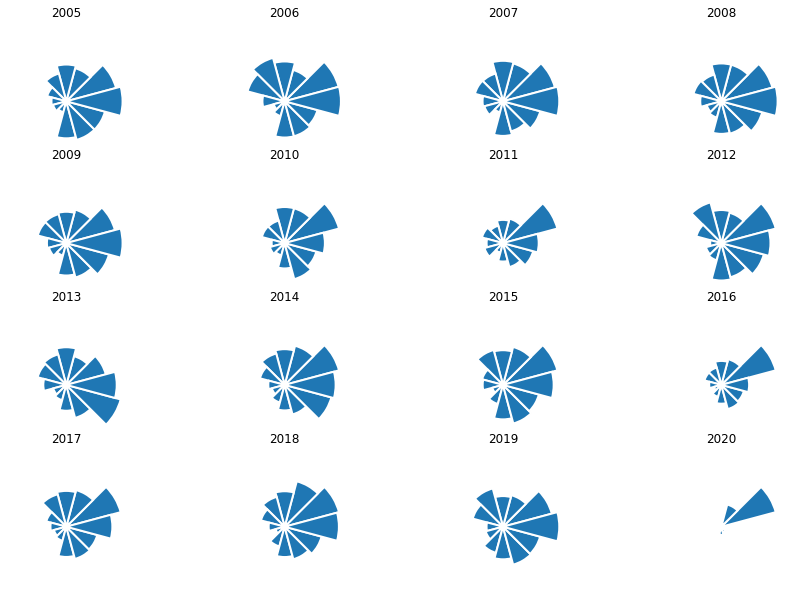

In [7]:
fig, ax = plt.subplots(4,4, subplot_kw=dict(projection="polar"), figsize=(15, 10));

df = mesi

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# little space between the bar and the label
labelPadding = 4

y = 2005

for i in range(0, 4):
    for j in range(0, 4):
        if (y > 2020):
            break
            
        tmp = mesi[mesi['Year'] == y]
#         tmp = tmp.sort_values(by=['Incasso'])
        
        # remove grid
        ax[i, j].axis('off')

        # Compute max and min in the dataset
        m = tmp['Incasso'].max()

        # Let's compute heights: they are a conversion of each item value in those new coordinates
        slope = (m - lowerLimit) / m
        heights = slope * tmp.Incasso + lowerLimit

        # Compute the width of each bar. In total we have 2*Pi = 360°
        width = 2*np.pi / len(tmp.index)

        # Compute the angle each bar is centered on:
        indexes = list(range(1, len(tmp.index)+1))
        angles = [element * width for element in indexes]
        angles

        # Draw bars
        bars = ax[i, j].bar(
            x=angles, 
            height=heights, 
            width=width, 
            bottom=lowerLimit,
            linewidth=2, 
            edgecolor="white")
            
        ax[i, j].set_title(y)

        # Add labels
#         for bar, angle, height, label in zip(bars,angles, heights, tmp["Mese"]):

#             # Labels are rotated. Rotation must be specified in degrees :(
#             rotation = np.rad2deg(angle)

#             # Flip some labels upside down
#             alignment = ""
#             if angle >= np.pi/2 and angle < 3*np.pi/2:
#                 alignment = "right"
#                 rotation = rotation + 180
#             else: 
#                 alignment = "left"

#             # Finally add the labels
#             ax[i, j].text(
#                 x=angle, 
#                 y=lowerLimit + bar.get_height() + labelPadding, 
#                 s=label, 
#                 ha=alignment, 
#                 va='center', 
#                 rotation=rotation, 
#                 rotation_mode="anchor")
        # passo all'anno successivo
        y += 1
    else:
        continue
    break
    
plt.savefig('Dati_Cinema_Italiani/plots/Incassi_smallmultiple_circular_barplot', bbox_inches='tight')
    
plt.show()

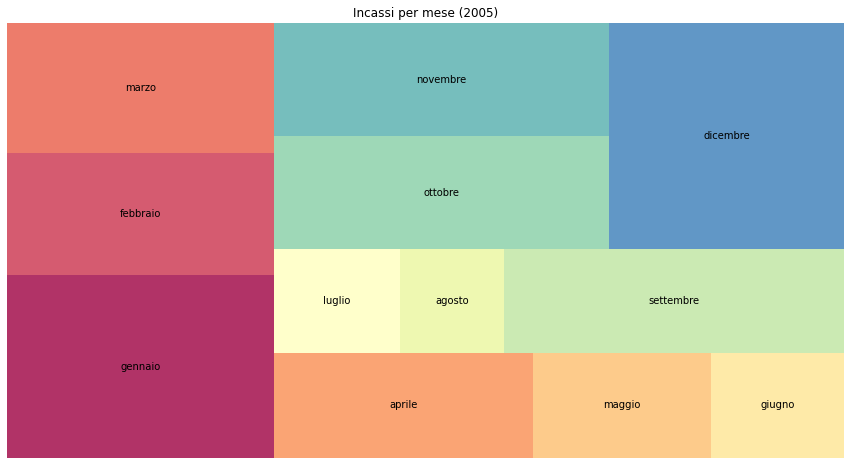

In [8]:
# squarify

inc = mesi[mesi['Year'] == 2005]

fig, ax = plt.subplots(figsize=(15,8))

labels = inc['Mese']
sizes = inc['Incasso']
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Incassi per mese (2005)')
plt.axis('off')

plt.show()

In [28]:
df = px.data.gapminder().query("year == 2007")

fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()